In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re 
import datetime
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#CVS only with CITROEN and AUDI
citroen_audi_df = pd.read_csv("citroen_audi_df.csv")

## DATAFRAME FOR AUDI AND CITROEN

We chose audi and citroen because they have models with similar prices and we can see if the brand as an impact on the depreciation

In [3]:
citroen_audi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   car_model          1357 non-null   object
 1   car_brand          1397 non-null   object
 2   car_full_name      1397 non-null   object
 3   registration_year  1397 non-null   int64 
 4   km_to_date         1397 non-null   int64 
 5   sale_price         1397 non-null   int64 
 6   fuel_type          1397 non-null   object
 7   transmission_type  1397 non-null   object
 8   sale_picture_link  1397 non-null   object
dtypes: int64(3), object(6)
memory usage: 98.4+ KB


In [4]:
value_counts = citroen_audi_df['car_model'].value_counts()
value_counts

c4          297
c3          235
a3          152
a4          111
a6           76
a5           69
a1           64
tt           57
c5           52
e-tron       36
q2           36
c1           35
ds3          30
q5           22
q3           18
berlingo     15
a7           14
a8           10
q7            8
ds5           6
r8            6
q8            4
ds4           4
Name: car_model, dtype: int64

We will go for Citroen C3 and AUDI A1 because they are similar models

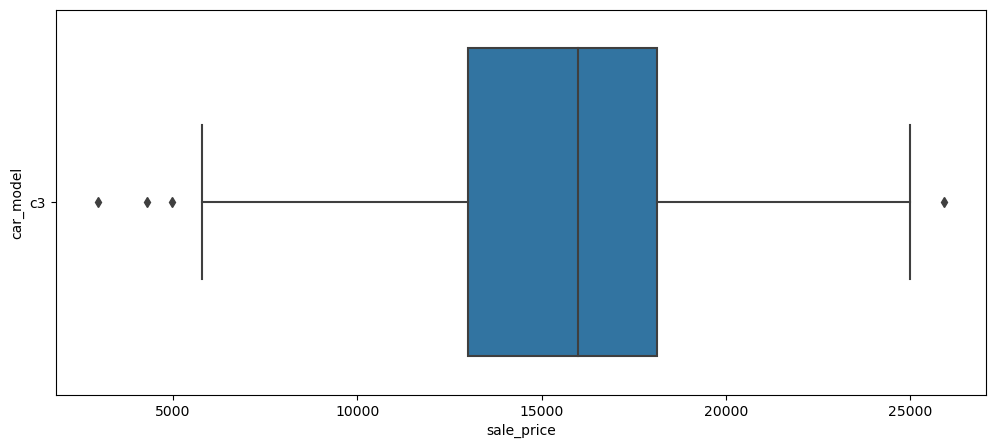

In [5]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=citroen_audi_df[(citroen_audi_df["car_model"] == "c3")], x="sale_price", y="car_model")
plt.show()

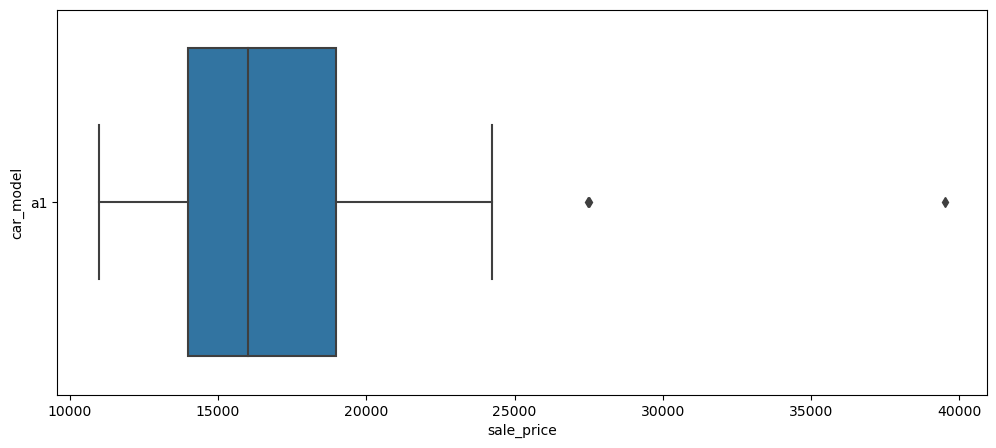

In [6]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=citroen_audi_df[(citroen_audi_df["car_model"] == "a1")], x="sale_price", y="car_model")
plt.show()

Set the price range to above 7000€ and below 25000€ 

In [7]:
filtered_citroen_audi_7_25k_df = citroen_audi_df[(citroen_audi_df["sale_price"] >= 7000) & (citroen_audi_df["sale_price"] <= 25000)]
filtered_citroen_audi_7_25k_df = filtered_citroen_audi_7_25k_df[(filtered_citroen_audi_7_25k_df["car_model"] == "c3") | (filtered_citroen_audi_7_25k_df["car_model"] == "a1")]

In [8]:
value_counts = filtered_citroen_audi_7_25k_df['car_model'].value_counts()
value_counts

c3    227
a1     61
Name: car_model, dtype: int64

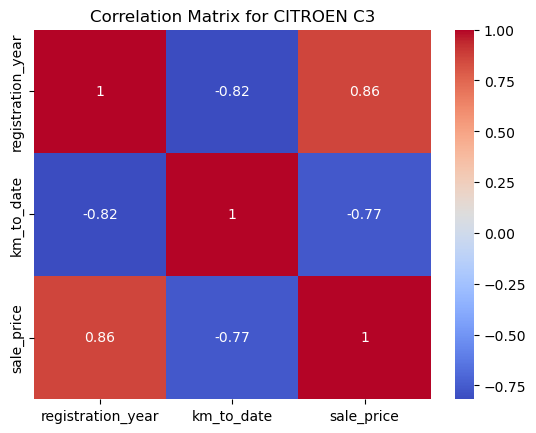

In [9]:
correlation_matrix_c3 = filtered_citroen_audi_7_25k_df[filtered_citroen_audi_7_25k_df["car_model"] == "c3"].corr()
sns.heatmap(correlation_matrix_c3, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for CITROEN C3')
plt.show()

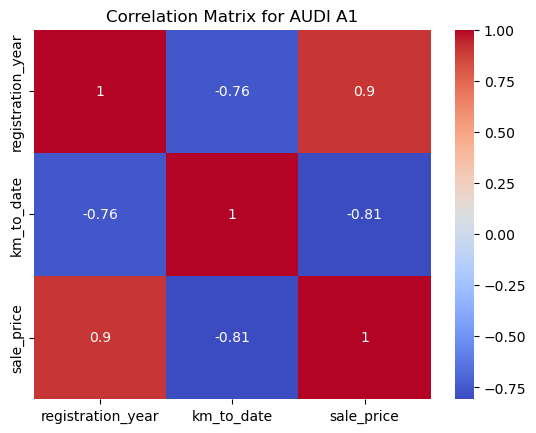

In [10]:
correlation_matrix_a1 = filtered_citroen_audi_7_25k_df[filtered_citroen_audi_7_25k_df["car_model"] == "a1"].corr()
sns.heatmap(correlation_matrix_a1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for AUDI A1')
plt.show()

By this, we can make the assumption km and age have a substantial impact on the sale price. The correlation values are similar, since the two models are very similar as well.

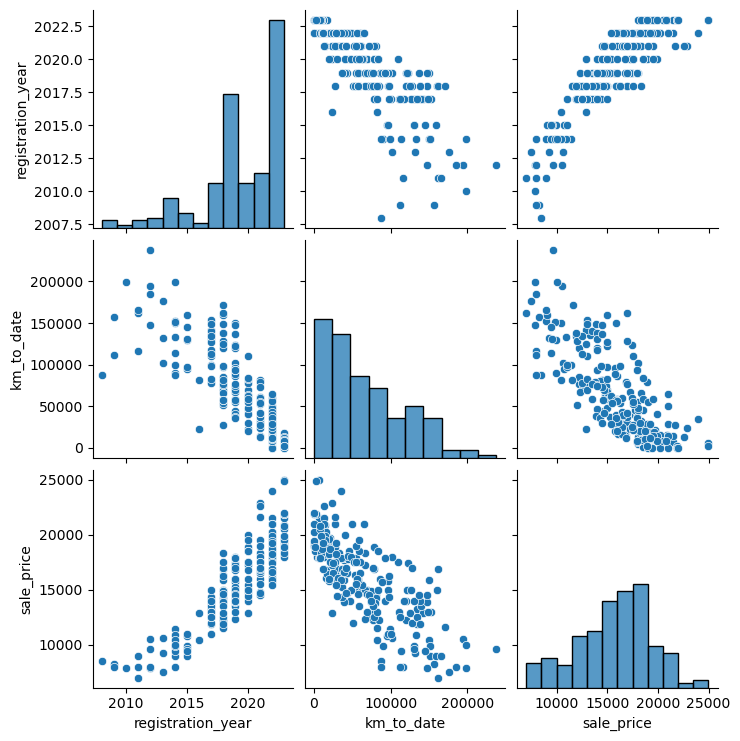

In [11]:
columns = ["car_model", "car_brand", "car_full_name", "registration_year", "km_to_date", "sale_price", "fuel_type", "transmission_type", "sale_picture_link"]
model_filter = filtered_citroen_audi_7_25k_df["car_model"] == "c3"
sns.pairplot(filtered_citroen_audi_7_25k_df[model_filter][columns])
plt.show()

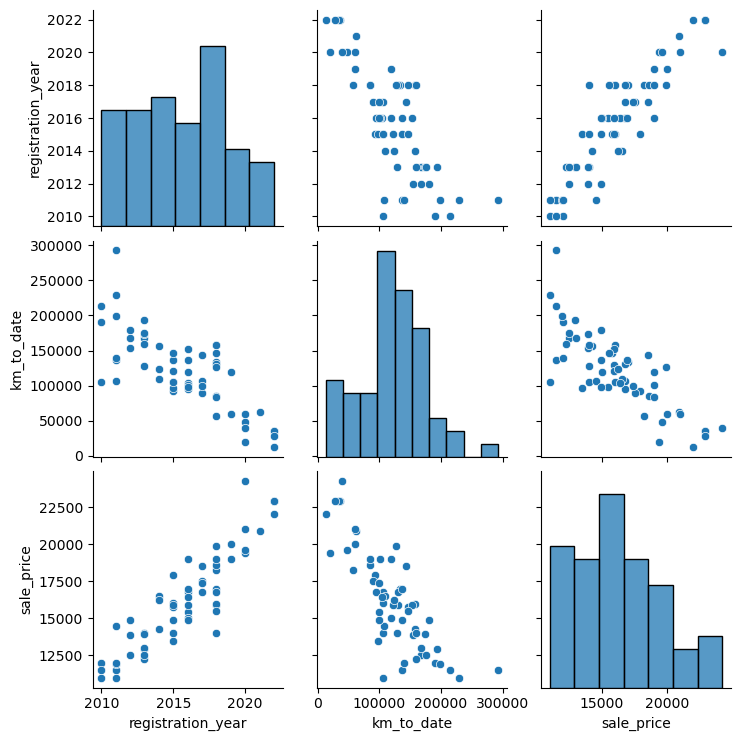

In [12]:
columns = ["car_model", "car_brand", "car_full_name", "registration_year", "km_to_date", "sale_price", "fuel_type", "transmission_type", "sale_picture_link"]
model_filter = filtered_citroen_audi_7_25k_df["car_model"] == "a1"
sns.pairplot(filtered_citroen_audi_7_25k_df[model_filter][columns])
plt.show()

As we assumed, age and km have a strong negative correlation with sale price, meaning that when we increase the km or age, the price goes down.

For curiosity, we will make a column called, km to age ratio

In [13]:
current_year = datetime.datetime.now().year
filtered_citroen_audi_7_25k_df["car_age"] = current_year - filtered_citroen_audi_7_25k_df["registration_year"]

In [14]:
filtered_citroen_audi_7_25k_df['km_age_ratio'] = filtered_citroen_audi_7_25k_df['km_to_date'] / filtered_citroen_audi_7_25k_df['car_age']

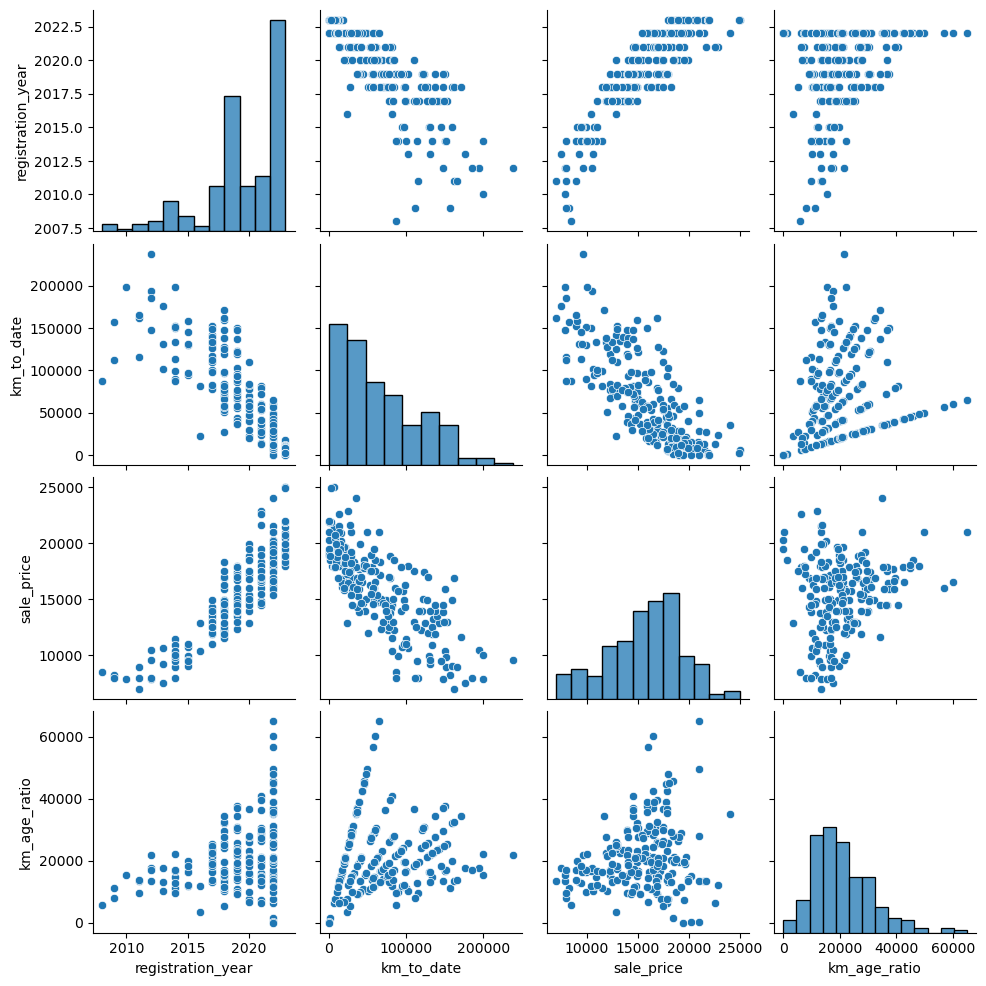

In [15]:
columns = ["car_model", "car_brand", "car_full_name", "registration_year", "km_to_date", "sale_price", "fuel_type", "transmission_type", "sale_picture_link", "km_age_ratio"]
model_filter = filtered_citroen_audi_7_25k_df["car_model"] == "c3"
sns.pairplot(filtered_citroen_audi_7_25k_df[model_filter][columns])
plt.show()

Does not add anything new.

## DEPRECIATION CALC.

#### Depreciation of sale price based on registration year

In [16]:
filtered_citroen_audi_7_25k_df["depreciation"] = 0.0
filtered_citroen_audi_7_25k_df["depreciation"] = filtered_citroen_audi_7_25k_df["sale_price"] / filtered_citroen_audi_7_25k_df["car_age"]

Group by car age and calculate the mean for C3 and A1 models

In [17]:
c3_avg_depreciation = filtered_citroen_audi_7_25k_df[filtered_citroen_audi_7_25k_df["car_model"] == "c3"].groupby("car_age")["depreciation"].mean()
a1_avg_depreciation = filtered_citroen_audi_7_25k_df[filtered_citroen_audi_7_25k_df["car_model"] == "a1"].groupby("car_age")["depreciation"].mean()

Plot

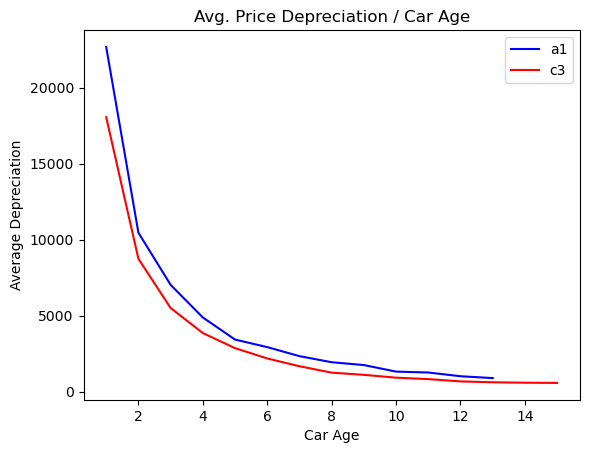

In [18]:
plt.plot(a1_avg_depreciation.index, a1_avg_depreciation.values, label="a1", color="blue")
plt.plot(c3_avg_depreciation.index, c3_avg_depreciation.values, label="c3", color="red")
plt.xlabel("Car Age")
plt.ylabel("Average Depreciation")
plt.title("Avg. Price Depreciation / Car Age")
plt.legend()
plt.show()

Lets add other brands

In [19]:
vw_renault_df = pd.read_csv("vw_renault_df.csv")
vw_renault_df = vw_renault_df[(citroen_audi_df["sale_price"] >= 7000) & (vw_renault_df["sale_price"] <= 25000)]
vw_renault_df = vw_renault_df[(vw_renault_df["car_model"] == "polo") | (vw_renault_df["car_model"] == "clio")]

In [20]:
current_year = datetime.datetime.now().year
vw_renault_df["car_age"] = current_year - vw_renault_df["registration_year"]
vw_renault_df["depreciation"] = 0.0
vw_renault_df["depreciation"] = vw_renault_df["sale_price"] / vw_renault_df["car_age"]
polo_avg_depreciation = vw_renault_df[vw_renault_df["car_model"] == "polo"].groupby("car_age")["depreciation"].mean()
clio_avg_depreciation = vw_renault_df[vw_renault_df["car_model"] == "clio"].groupby("car_age")["depreciation"].mean()

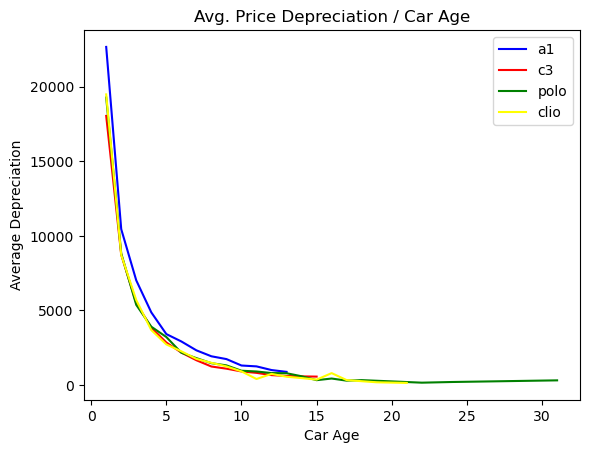

In [21]:
plt.plot(a1_avg_depreciation.index, a1_avg_depreciation.values, label="a1", color="blue")
plt.plot(c3_avg_depreciation.index, c3_avg_depreciation.values, label="c3", color="red")
plt.plot(polo_avg_depreciation.index, polo_avg_depreciation.values, label="polo", color="green")
plt.plot(clio_avg_depreciation.index, clio_avg_depreciation.values, label="clio", color="yellow")
plt.xlabel("Car Age")
plt.ylabel("Average Depreciation")
plt.title("Avg. Price Depreciation / Car Age")
plt.legend()
plt.show()

# Conclusion 

#### For similar models, brand has no significant effect on the depreciation of price based on the age of the car

# WILL CONTINUE ON PREDICTION OF PRICE BASED ON MODEL (CITROEN C3 and AUDI A1)

In [22]:
filtered_citroen_audi_7_25k_df.to_csv('filtered_citroen_audi_7_25k_df.csv', index=False)